#Since We need freq vs time graph as spectrometer hence we need a lenght of curve only in fourier Series
#There is a function plt.histogram for spectrometer but first we will try it manually with y=x^2 graph

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import random

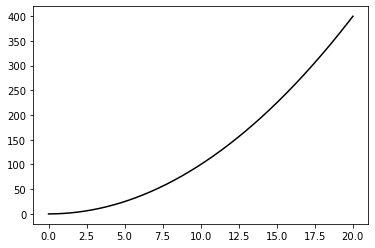

20000

In [2]:
x=np.arange(0,20,0.001)
y=x*x
plt.plot(x,y,color='k')
plt.show()
n=len(x)
n

In [3]:
step=2000
maxfreq=n//2
PSDvsTime=np.array([0]*maxfreq)
PSDvsTime=PSDvsTime.reshape(maxfreq,1)
for i in range(0,n-step,step):
    Window=y[i:i+step]
    ffft=np.fft.fft(Window,maxfreq)
    PSD=ffft*np.conj(ffft)/maxfreq
    PSD=PSD[:maxfreq]
    PSD=PSD.reshape(maxfreq,1)
    PSDvsTime=np.append(PSDvsTime,PSD,axis=1)
PSDvsTime.shape

(10000, 10)

In [4]:
val=np.amax(PSDvsTime)

In [5]:
indices=PSDvsTime<0.001
PSDvsTime=indices*PSDvsTime

In [ ]:
partofcurve=10
for i in range(maxfreq):
    plt.scatter(list(range(0,partofcurve)),[i]*(partofcurve), c=PSDvsTime[i][:partofcurve])
    
    #plt.colorbar()
plt.show()

#Spectrogram Audio

In [51]:
tmax=4
dt=0.0001
t=np.arange(0,tmax,dt)
fmin=200
fmax=1000
f=np.sin((fmin+((fmax-fmin)/tmax)*t)*2*np.pi*t)

In [45]:
import sounddevice as sd  
sd.play(f,samplerate=1/dt)

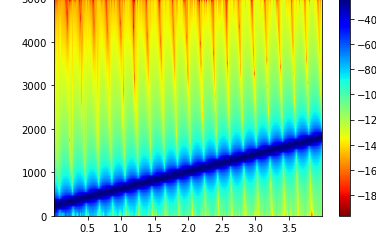

In [52]:
plt.specgram(f,NFFT=128,Fs=1/dt,noverlap=10,cmap='jet_r')
plt.colorbar()
plt.show()